# For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

01 - Problem (case study)
Data Description.
Goal.

02 - Getting Data
Read the .csv file.

03 - Cleaning/Wrangling/EDA
Change headers names.
Deal with NaN values.
Categorical Features.
Numerical Features.
Exploration.

04 - Processing Data
Dealing with outliers.
Normalization.
Encoding Categorical Data.
Splitting into train set and test set.

05 - Modeling
Apply model.

06 - Model Validation
R2.
MSE.
RMSE.
MAE.

07 - Reporting
Present results.

In [6]:
#Importing packages and file
import numpy as np
import pandas as pd
import time
from datetime import date
mimi = pd.read_csv('C:/Users/Mimzd/Desktop/marketing_customer_analysis.csv')

In [8]:
#Showing dataframe shape
mimi.shape

(9134, 24)

In [11]:
#Standardize header names
mimi.columns.to_list()

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [14]:
def standardize(col):
    return col.lower().replace(" ","_")
newcolumns=[]
for col in mimi.columns.to_list():
    newcolumns.append(standardize(col))
mimi.columns=newcolumns
mimi.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [15]:
#Numerical Columns
mimi.select_dtypes(np.number)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [16]:
#Categorical Columns
mimi.select_dtypes(include='object')

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [17]:
#Dealing with NaN values
#Checking the amounts
mimi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [18]:
#Checking for fully empty rows
mimi.isna().all(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
9129    False
9130    False
9131    False
9132    False
9133    False
Length: 9134, dtype: bool

In [19]:
#Checking the proportions of nulls in each column
nulls=pd.DataFrame(round(mimi.isna().sum()/len(mimi),4)*100)
nulls=nulls.rename(columns={'index':'header',0:'nulls'})
nulls

,nulls
customer,0.0
state,0.0
customer_lifetime_value,0.0
response,0.0
coverage,0.0
education,0.0
effective_to_date,0.0
employmentstatus,0.0
gender,0.0
income,0.0


In [22]:
#Checking the values of the most nulls in a column: gender
mimi['gender'].unique()

array(['F', 'M'], dtype=object)

In [24]:
#Removing column

cleanmimiheh=mimi.drop(['gender'],axis = 1) 

In [27]:
#Checking values of the vehicle class column
cleanmimiheh['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

In [28]:
#Filling NaN with unknown

cleanmimiheh['vehicle_class']=cleanmimiheh['vehicle_class'].fillna("Unknown")

In [31]:
#Re-checking the amount of nulls in the dataframe
newcoolernulls=pd.DataFrame(round(cleanmimiheh.isna().sum()/len(cleanmimiheh),4)*100)
newcoolernulls

,0
customer,0.0
state,0.0
customer_lifetime_value,0.0
response,0.0
coverage,0.0
education,0.0
effective_to_date,0.0
employmentstatus,0.0
income,0.0
location_code,0.0


In [40]:
#Datetime format
#Extracting the months from the dataset and storing them in a separate column
cleanmimiheh["month"]=cleanmimiheh["effective_to_date"].dt.strftime("%b")


#'Can only use .dt accessor with datetimelike values' but this is a datatimelike valueeeeeeeeeee>.<


AttributeError: Can only use .dt accessor with datetimelike values

In [42]:
#EDA (Exploratory Data Analysis)
import matplotlib.pyplot as plt 
import seaborn as sns

In [46]:
#Show DataFrame info
cleanmimiheh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   income                         9134 non-null   int64  
 9   location_code                  9134 non-null   object 
 10  marital_status                 9134 non-null   object 
 11  monthly_premium_auto           9134 non-null   int64  
 12  months_since_last_claim        9134 non-null   i

In [45]:
#Describe DataFrame
cleanmimiheh.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


<AxesSubplot:>

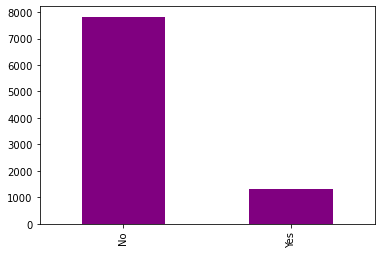

In [47]:
#Show a plot of the total number of responses (for each response type - "Yes"/"No")
cleanmca["response"].value_counts().plot(kind="bar",color="purple")

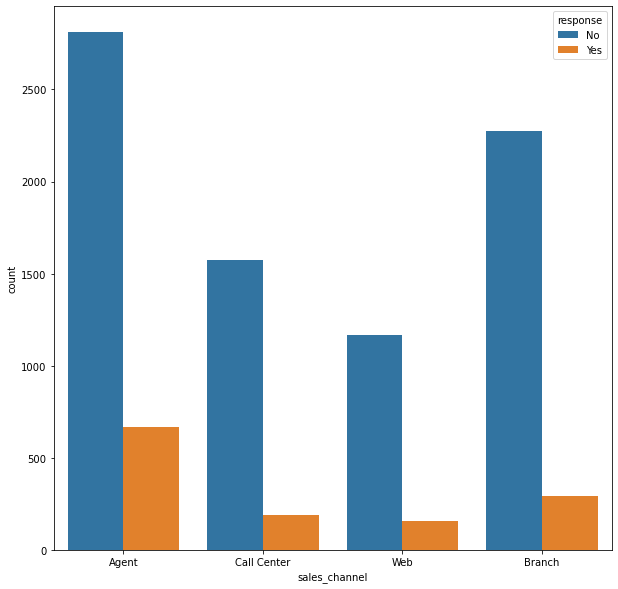

In [50]:
#Show a plot of the rate of the response types by each Sales Channel
plt.figure(figsize=(10,10))
sns.countplot(x="sales_channel",hue="response",data=cleanmimiheh)
plt.show()

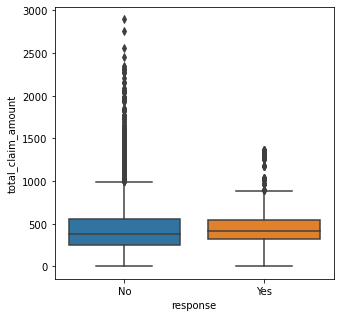

In [52]:
#Show a plot of the distribution of the Total Claim Amount, broken down by response type. Try a boxplot and distribution plot, for each response type. For the distribution plot, try to plot both kinds of responses in one chart
plt.figure(figsize=(5,5))
sns.boxplot(x="response", y="total_claim_amount", data=cleanmimiheh)
plt.show()

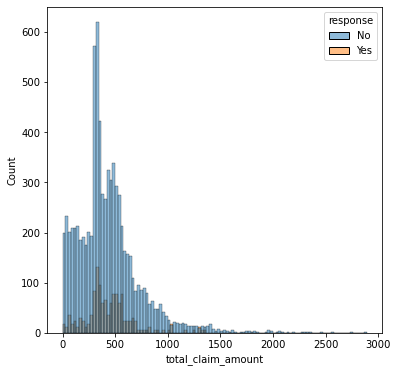

In [53]:
plt.figure(figsize=(6,6))
sns.histplot(data=cleanmimiheh, x="total_claim_amount", hue="response")
plt.show()

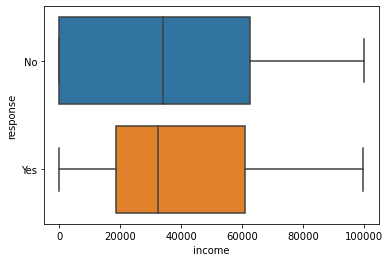

In [54]:
#Create similar plots like in the task before, but for Income
sns.boxplot(x="income", y="response", data=cleanmimiheh)
plt.show()

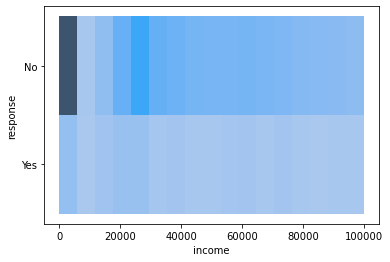

In [55]:
sns.histplot(data=cleanmca, x="income", y="response")
plt.show()

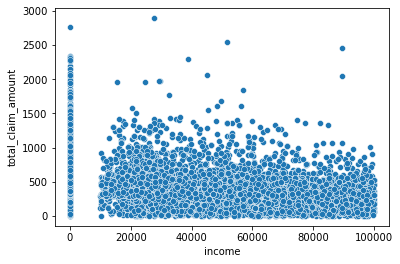

In [56]:
#Create a scatterplot between Total Claim Amount and Income, try different settings
sns.scatterplot(data=cleanmimiheh, x="income", y="total_claim_amount")
plt.show()

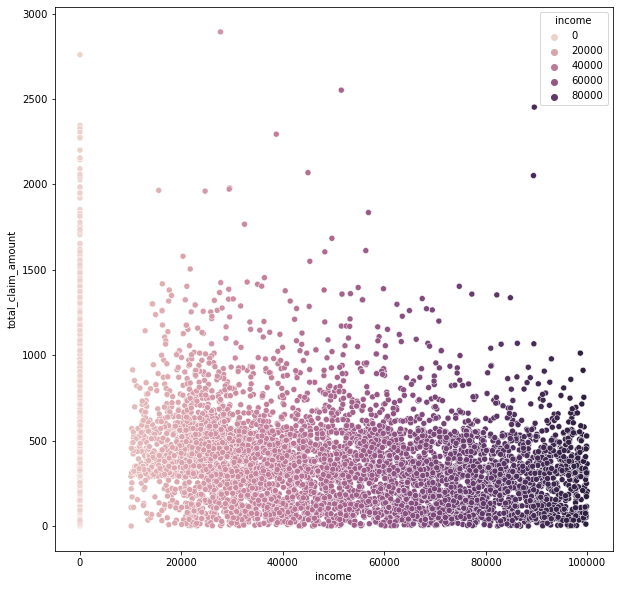

In [57]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cleanmimiheh, x="income", y="total_claim_amount", hue="income")
plt.show()

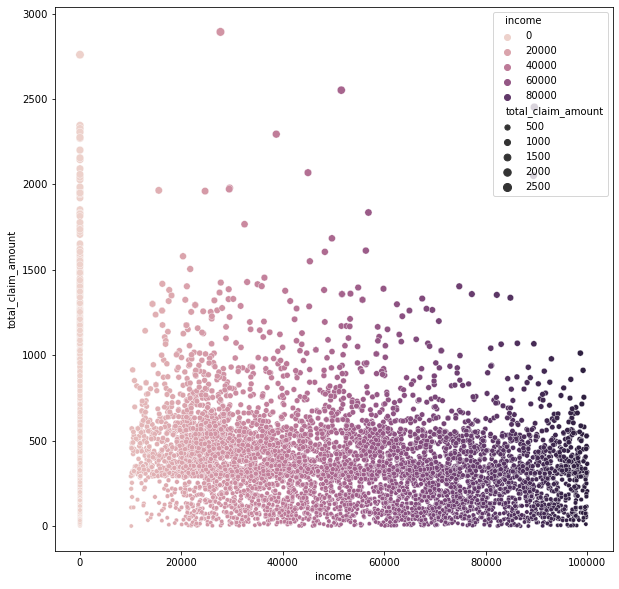

In [58]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cleanmimiheh, x="income", y="total_claim_amount", hue="income", size="total_claim_amount")
plt.show()

In [59]:
#Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals
cleanmimiheh.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [60]:
numerical=cleanmimiheh._get_numeric_data()
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


In [61]:
categorical=cleanmimiheh.select_dtypes(include="object")
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer           9134 non-null   object
 1   state              9134 non-null   object
 2   response           9134 non-null   object
 3   coverage           9134 non-null   object
 4   education          9134 non-null   object
 5   effective_to_date  9134 non-null   object
 6   employmentstatus   9134 non-null   object
 7   location_code      9134 non-null   object
 8   marital_status     9134 non-null   object
 9   policy_type        9134 non-null   object
 10  policy             9134 non-null   object
 11  renew_offer_type   9134 non-null   object
 12  sales_channel      9134 non-null   object
 13  vehicle_class      9134 non-null   object
 14  vehicle_size       9134 non-null   object
dtypes: object(15)
memory usage: 1.0+ MB


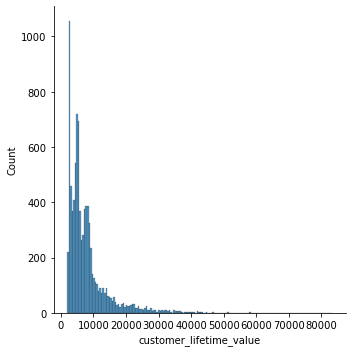

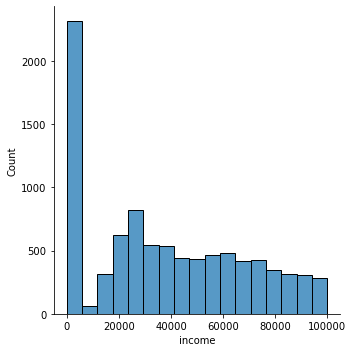

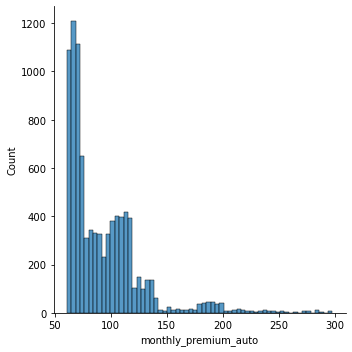

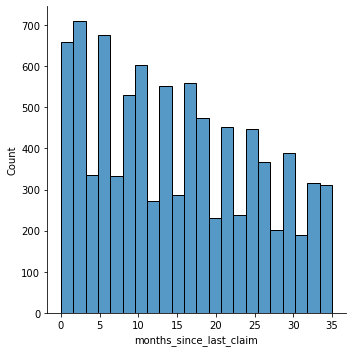

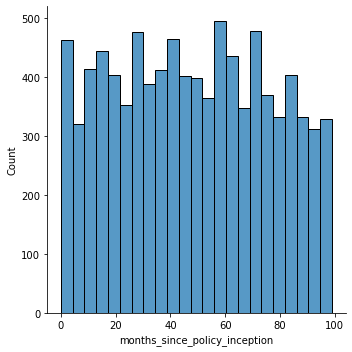

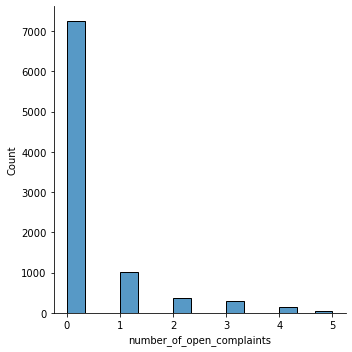

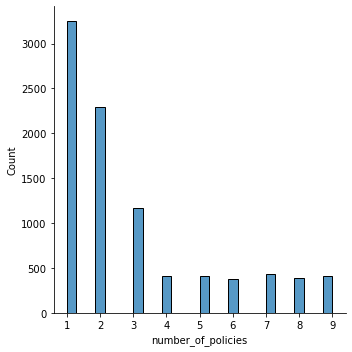

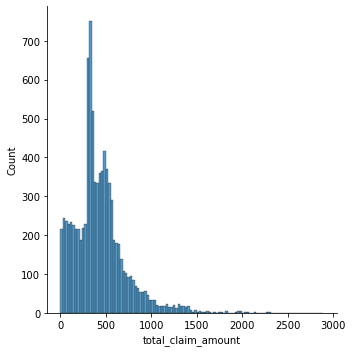

In [62]:
#Use seaborn library to construct distribution plots for the numerical variables
for i in numerical:
    sns.displot(numerical[i])

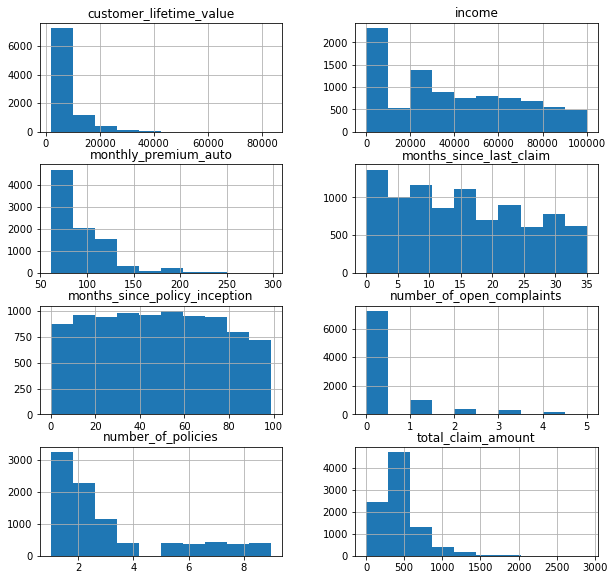

In [70]:
#Use Matplotlib to construct histograms
numerical.hist(figsize=(10, 15), layout=(6, 2))
plt.show()

In [72]:
#Pre-Processing Data
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
cleanmimiheh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   income                         9134 non-null   int64  
 9   location_code                  9134 non-null   object 
 10  marital_status                 9134 non-null   object 
 11  monthly_premium_auto           9134 non-null   int64  
 12  months_since_last_claim        9134 non-null   i

<AxesSubplot:>

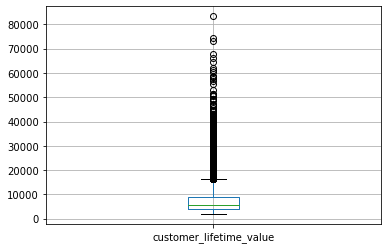

In [73]:
#Dealing with outliers.
numerical[['customer_lifetime_value']].boxplot()

<AxesSubplot:>

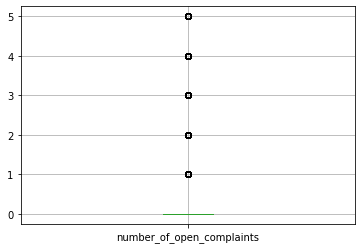

In [74]:
numerical[['number_of_open_complaints']].boxplot()

<AxesSubplot:>

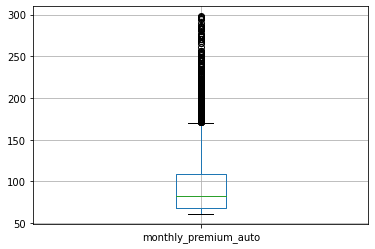

In [75]:
numerical[['monthly_premium_auto']].boxplot()

In [92]:
mimi_num = mimi.select_dtypes(include = np.number)

In [96]:
from scipy import stats
from scipy.stats import norm, skew, boxcox_normmax

In [97]:
skewed_features = mimi_num.apply(lambda x:stats.skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew value' :skewed_features})
skewness.head(20)

,Skew value
customer_lifetime_value,3.031782
number_of_open_complaints,2.782806
monthly_premium_auto,2.123198
total_claim_amount,1.714684
number_of_policies,1.253127
income,0.286840
months_since_last_claim,0.278541
months_since_policy_inception,0.040158


In [98]:
skewed_features = mimi_num.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_features})
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index
    
for i in skew_index:
    mimi_num[i] = np.log1p(mimi_num[i])
mimi_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,7.924622,56274,4.248495,32,5,0.000000,0.693147,5.955348
1,8.850881,0,4.553877,13,42,0.000000,2.197225,7.032152
2,9.464085,48767,4.691348,18,38,0.000000,1.098612,6.341192
3,8.942051,0,4.672829,18,65,0.000000,2.079442,6.274539
4,7.942608,43836,4.304065,12,44,0.000000,0.693147,4.935415
...,...,...,...,...,...,...,...,...
9129,10.060790,71941,4.304065,18,89,0.000000,1.098612,5.294484
9130,8.038354,21604,4.382027,14,28,0.000000,0.693147,5.940697
9131,9.007599,0,4.454347,9,37,1.386294,1.098612,6.674290
9132,8.926045,21941,4.574711,34,3,0.000000,1.386294,6.539875


In [109]:
numerical_features = data_num.drop(['total_claim_amount_log'],axis=1)
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(numerical_features)
x_standard = transformer.transform(numerical_features)
print(x_standard)

[[-0.76287773  0.61282744 -0.70392465 ... -1.54328695 -0.42224956
  -0.82264788]
 [-0.14924546 -1.23961684  0.02269103 ... -0.21733419 -0.42224956
   2.10615996]
 [ 0.71063622  0.36570978  0.42959581 ... -0.36068043 -0.42224956
  -0.40424676]
 ...
 [ 0.02313483 -1.23961684 -0.23889062 ... -0.39651699  2.87324529
  -0.40424676]
 [-0.06993547 -0.51735647  0.08082028 ... -1.61496007 -0.42224956
   0.01415436]
 [-0.78495478 -1.23961684 -0.47140763 ...  1.50282075 -0.42224956
  -0.82264788]]


In [108]:
mimi_num.rename(columns={'monthly_premium_auto': 'monthly_premium_auto_log', 'total_claim_amount': 'total_claim_amount_log',
                              'customer_lifetime_value': 'customer_lifetime_value_log'}, inplace = True)
mimi_num

,customer_lifetime_value_log,income,monthly_premium_auto_log,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount_log
0,7.924622,56274,4.248495,32,5,0.000000,0.693147,5.955348
1,8.850881,0,4.553877,13,42,0.000000,2.197225,7.032152
2,9.464085,48767,4.691348,18,38,0.000000,1.098612,6.341192
3,8.942051,0,4.672829,18,65,0.000000,2.079442,6.274539
4,7.942608,43836,4.304065,12,44,0.000000,0.693147,4.935415
...,...,...,...,...,...,...,...,...
9129,10.060790,71941,4.304065,18,89,0.000000,1.098612,5.294484
9130,8.038354,21604,4.382027,14,28,0.000000,0.693147,5.940697
9131,9.007599,0,4.454347,9,37,1.386294,1.098612,6.674290
9132,8.926045,21941,4.574711,34,3,0.000000,1.386294,6.539875


In [120]:
mimi_num = mimi.select_dtypes(include = np.number)
mimi_cat = mimi.select_dtypes(include = np.object)
mimi_cat

C:\Users\Mimzd\AppData\Local\Temp\ipykernel_10964\332047906.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mimi_cat = mimi.select_dtypes(include = np.object)


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [121]:
mimi_cat=mimi_cat.drop(['customer','effective_to_date'], axis = 1)
mimi_cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [145]:
cleanmimiheh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   income                         9134 non-null   int64  
 9   location_code                  9134 non-null   object 
 10  marital_status                 9134 non-null   object 
 11  monthly_premium_auto           9134 non-null   int64  
 12  months_since_last_claim        9134 non-null   i

In [148]:
X=cleanmimiheh.drop(['customer', 
                 'months_since_policy_inception', 
                 'number_of_policies', 
                 'number_of_open_complaints', 
                 'total_claim_amount', 
                 'months_since_last_claim'], axis=1)

In [149]:
X_numerical = X.select_dtypes(include = np.number)

In [150]:
from sklearn.preprocessing import StandardScaler
transformer=StandardScaler().fit(X_numerical)
X_standardised=transformer.transform(X_numerical)

In [151]:
X_numerical=X_standardised

In [153]:
X_categorical = X.select_dtypes(include = object)

In [154]:
X = np.concatenate((X_numerical, X_categorical), axis=1)

In [155]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.4, random_state=40)

In [160]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

In [166]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [171]:
x_num=X.select_dtypes(np.number)

AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

In [170]:
x_num_norm.columns=x_num.columns
x_num_norm.head()

NameError: name 'x_num' is not defined

In [169]:
x_new=pd.concat([x_num_norm,x_cat_en],axis=1)
print(x_new.shape)
x_new.head()

NameError: name 'x_num_norm' is not defined

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x_new,Y,test_size=0.3,random_state=100)
#split


#Linear Regression
lm=linear_model.LinearRegression()
model=lm.fit(x_train,y_train)
predictions=lm.predict(x_test)
r2_score(y_test,predictions)

NameError: name 'x_new' is not defined

In [163]:
lm=linear_model.LinearRegression()
model=lm.fit(X_train,y_train)
predictions=lm.predict(X_test)

ValueError: could not convert string to float: 'California'

In [ ]:
R2 = r2_score(y_test,predictions)
R2

In [130]:
import numpy as np

In [137]:
x= pd.concat([x_standard, mimi_cat],axis= 1).values
x

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [135]:
y=mimi_num['total_claim_amount_log']
y

KeyError: 'total_claim_amount_log'

In [128]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state=100)

NameError: name 'x' is not defined

In [125]:
def r2(y, y_pred):
    return r2_score(y, y_pred)

In [112]:
scores={'R2':[r2(y_test, y_pred),r2(y_train, y_pred_train)],'MSE': [mse(y_test, y_pred),mse(y_train, y_pred_train)],'RMSE':[rmse(y_test, y_pred),rmse(y_train, y_pred_train)],'MAE':[mae(y_test, y_pred),mae(y_train, y_pred_train)]}

final_score = pd.DataFrame(scores, index=['scores of test set', 'scores of training set'])
final_score 

NameError: name 'y_test' is not defined